<a href="https://colab.research.google.com/github/RogMaverick18/ML-Lab-assignments/blob/main/ML_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


A1: Demonstration of Summation, Activation, and Comparator Units
Summation Output: 1.1
Step(1.1) = 1
Bipolar Step(1.1) = 1
Sigmoid(1.1) = 0.7502601055951177
Tanh(1.1) = 0.8004990217606297
ReLU(1.1) = 1.1
Leaky ReLU(1.1) = 1.1
Error Comparator (actual - predicted): 0

A2: Perceptron Training - AND Gate
Converged in 130 epochs
Final weights: [0.1  0.05], Bias: -0.10000000000000765


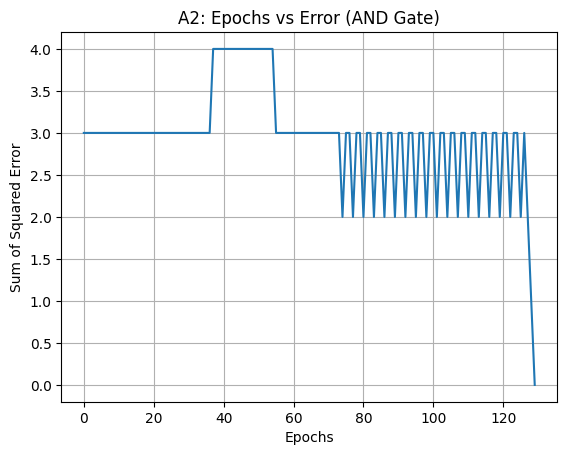


A3: Activation Function Comparison (AND Gate)
Step: 130 epochs
Bipolar Step: 1000 epochs
Sigmoid: 130 epochs
Tanh: 117 epochs
ReLU: 75 epochs
Leaky ReLU: 75 epochs

A4: Learning Rate vs Epochs


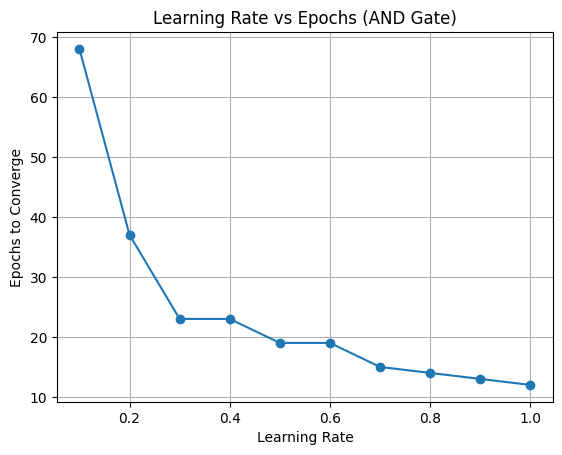


A5: XOR Gate - A1 to A3
Summation Output for XOR [1,1]: 0.1
Step: 1 | Bipolar Step: 1 | Sigmoid: 0.5250 | Tanh: 0.0997 | ReLU: 0.1 | Leaky ReLU: 0.1
Step Activation XOR - Epochs: 1000, Final Weights: [-0.1 -0.1], Bias: 0.09999999999999236
Step Activation XOR: 1000 epochs
Bipolar Step Activation XOR: 1000 epochs
Sigmoid Activation XOR: 1000 epochs
Tanh Activation XOR: 1000 epochs
ReLU Activation XOR: 1000 epochs
Leaky ReLU Activation XOR: 1000 epochs

A6: Train on Customer Data
Customer Model Weights: [-1.81067954  2.75068765 -0.68247637 11.32998588], Bias: -5.084221849245712

A7: Pseudo-Inverse on Customer Data
Pseudo-Inverse Weights: [-0.32112281 -0.3337376  -0.24943715  1.66444272], Bias: 0.11907060677043767

 Comparing Perceptron vs Pseudo-Inverse on Customer Data
Index | Actual | Perceptron | Pseudo-Inverse
---------------------------------------------
  1   |   1    |     1      |        1       
  2   |   1    |     1      |        1       
  3   |   1    |     1      |        1

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# -------------------- A1: Units --------------------

def summation(inputs, weights, bias):
    return np.dot(inputs, weights) + bias

# Activation Functions
def step(x):
    return 1 if x >= 0 else 0

def bipolar_step(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

# Derivatives for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Error comparator
def error_comparator(predicted, actual):
    return actual - predicted

# -------------------- A2: Perceptron Training - AND Gate --------------------
def train_perceptron(X, y, activation_fn, lr=0.05, max_epochs=1000, tolerance=0.002):
    weights = np.array([0.2, -0.75])
    bias = 10
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            z = summation(X[i], weights, bias)
            pred = activation_fn(z)
            if isinstance(pred, float): pred = round(pred)
            err = error_comparator(pred, y[i])
            weights += lr * err * X[i]
            bias += lr * err
            total_error += err ** 2
        errors.append(total_error)
        if total_error <= tolerance:
            break

    return epoch + 1, weights, bias, errors

# -------------------- A3: Compare Activation Functions --------------------
def compare_activations(X, y, activations):
    results = {}
    for name, func in activations.items():
        epochs, _, _, _ = train_perceptron(X, y, func)
        results[name] = epochs
    return results

# -------------------- A4: Learning Rate vs Epochs --------------------
def learning_rate_vs_epochs(X, y, activation_fn):
    learning_rates = np.arange(0.1, 1.1, 0.1)
    epochs_list = []

    for lr in learning_rates:
        epochs, _, _, _ = train_perceptron(X, y, activation_fn, lr=lr)
        epochs_list.append(epochs)

    plt.plot(learning_rates, epochs_list, marker='o')
    plt.xlabel("Learning Rate")
    plt.ylabel("Epochs to Converge")
    plt.title("Learning Rate vs Epochs (AND Gate)")
    plt.grid(True)
    plt.show()

# -------------------- A5: XOR Gate with Activation Functions --------------------
def xor_gate_data():
    return np.array([[0,0],[0,1],[1,0],[1,1]]), np.array([0,1,1,0])

def test_xor_activations(activations):
    X, y = xor_gate_data()
    return compare_activations(X, y, activations)

# -------------------- A6: Customer Data --------------------
def customer_data():
    X = np.array([
        [20, 6, 2, 386],
        [16, 3, 6, 289],
        [27, 6, 2, 393],
        [19, 1, 2, 110],
        [24, 4, 2, 280],
        [22, 5, 2, 167],
        [15, 4, 2, 271],
        [18, 4, 2, 274],
        [21, 1, 4, 148],
        [16, 2, 4, 198]
    ])
    y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])
    return X, y

def train_customer_model(activation_fn=sigmoid, lr=0.05, max_epochs=1000):
    X, y = customer_data()
    X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))  # normalize
    weights = np.random.rand(X.shape[1])
    bias = np.random.rand()
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            z = summation(X[i], weights, bias)
            pred = activation_fn(z)
            err = y[i] - pred
            weights += lr * err * X[i]
            bias += lr * err
            total_error += err**2
        if total_error <= 0.002:
            print(f"Converged at epoch {epoch}")
            break
    return weights, bias

# -------------------- A7: Pseudo Inverse --------------------
def pseudo_inverse_solution():
    X, y = customer_data()
    X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_bias = np.c_[np.ones(X.shape[0]), X]
    pinv = np.linalg.pinv(X_bias)
    weights_full = np.dot(pinv, y)
    return weights_full[1:], weights_full[0]

def compare_customer_models():
    print("\n Comparing Perceptron vs Pseudo-Inverse on Customer Data")
    X, y = customer_data()
    X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    weights_p, bias_p = train_customer_model()
    preds_p = [round(sigmoid(summation(x, weights_p, bias_p))) for x in X_norm]
    weights_pi, bias_pi = pseudo_inverse_solution()
    preds_pi = [round(sigmoid(summation(x, weights_pi, bias_pi))) for x in X_norm]
    print("Index | Actual | Perceptron | Pseudo-Inverse")
    print("---------------------------------------------")
    for i in range(len(y)):
        print(f"{i+1:^5} | {y[i]:^6} | {preds_p[i]:^10} | {preds_pi[i]:^15}")

# -------------------- A8: Backpropagation on AND Gate --------------------
def backpropagation_AND():
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([[0],[0],[0],[1]])
    wh = np.random.uniform(size=(2, 2))
    bh = np.random.uniform(size=(1, 2))
    wo = np.random.uniform(size=(2, 1))
    bo = np.random.uniform(size=(1, 1))
    lr = 0.05

    for epoch in range(1000):
        hinp = np.dot(X, wh) + bh
        hact = sigmoid(hinp)
        outinp = np.dot(hact, wo) + bo
        output = sigmoid(outinp)
        error = y - output
        if np.mean(np.square(error)) < 0.002:
            break
        d_output = error * sigmoid_derivative(output)
        error_hidden = d_output.dot(wo.T)
        d_hidden = error_hidden * sigmoid_derivative(hact)
        wo += hact.T.dot(d_output) * lr
        bo += np.sum(d_output, axis=0, keepdims=True) * lr
        wh += X.T.dot(d_hidden) * lr
        bh += np.sum(d_hidden, axis=0, keepdims=True) * lr
    return epoch + 1

# -------------------- A9: XOR Perceptron --------------------
def train_xor_perceptron():
    X, y = xor_gate_data()
    return train_perceptron(X, y, step)

# -------------------- A10: XOR with Two Output Nodes --------------------
def train_xor_two_output():
    X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
    y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

    wh = np.random.uniform(size=(2, 2))
    bh = np.random.uniform(size=(1, 2))
    wo = np.random.uniform(size=(2, 2))
    bo = np.random.uniform(size=(1, 2))
    lr = 0.1

    for epoch in range(10000):
        hinp = np.dot(X, wh) + bh
        hact = sigmoid(hinp)
        outinp = np.dot(hact, wo) + bo
        output = sigmoid(outinp)

        error = y - output
        if np.mean(np.square(error)) < 0.01:
            break

        d_output = error * sigmoid_derivative(output)
        error_hidden = d_output.dot(wo.T)
        d_hidden = error_hidden * sigmoid_derivative(hact)

        wo += hact.T.dot(d_output) * lr
        bo += np.sum(d_output, axis=0, keepdims=True) * lr
        wh += X.T.dot(d_hidden) * lr
        bh += np.sum(d_hidden, axis=0, keepdims=True) * lr

    return epoch + 1, np.round(output, 2)

# -------------------- A11/A12: MLPClassifier --------------------
def sklearn_mlp_model(X, y, title="MLPClassifier"):
    model = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=1000)
    model.fit(X, y)
    preds = model.predict(X)
    acc = accuracy_score(y, preds)
    print(f"{title} - Predictions: {preds}")
    print(f"{title} - Accuracy: {acc}")

# -------------------- MAIN --------------------
def main():
    X_and, y_and = np.array([[0,0],[0,1],[1,0],[1,1]]), np.array([0,0,0,1])
    activations = {
        "Step": step,
        "Bipolar Step": bipolar_step,
        "Sigmoid": sigmoid,
        "Tanh": tanh,
        "ReLU": relu,
        "Leaky ReLU": leaky_relu
    }

    print("\nA1: Demonstration of Summation, Activation, and Comparator Units")

    inputs = np.array([1, -1])
    weights = np.array([0.5, -0.5])
    bias = 0.1
    z = summation(inputs, weights, bias)
    print(f"Summation Output: {z}")

    print(f"Step({z}) = {step(z)}")
    print(f"Bipolar Step({z}) = {bipolar_step(z)}")
    print(f"Sigmoid({z}) = {sigmoid(z)}")
    print(f"Tanh({z}) = {tanh(z)}")
    print(f"ReLU({z}) = {relu(z)}")
    print(f"Leaky ReLU({z}) = {leaky_relu(z)}")

    actual = 1
    predicted = step(z)
    print(f"Error Comparator (actual - predicted): {error_comparator(predicted, actual)}")

    print("\nA2: Perceptron Training - AND Gate")
    epochs, weights, bias, errors = train_perceptron(X_and, y_and, step)
    print(f"Converged in {epochs} epochs\nFinal weights: {weights}, Bias: {bias}")
    plt.plot(errors)
    plt.title("A2: Epochs vs Error (AND Gate)")
    plt.xlabel("Epochs")
    plt.ylabel("Sum of Squared Error")
    plt.grid(True)
    plt.show()

    print("\nA3: Activation Function Comparison (AND Gate)")
    results = compare_activations(X_and, y_and, activations)
    for name, ep in results.items():
        print(f"{name}: {ep} epochs")

    print("\nA4: Learning Rate vs Epochs")
    learning_rate_vs_epochs(X_and, y_and, step)

    print("\nA5: XOR Gate - A1 to A3")

    # A1-style: Show activations on XOR input [1, 1]
    x_xor_sample = np.array([1, 1])
    w_xor = np.array([0.5, -0.5])
    b_xor = 0.1
    z_xor = summation(x_xor_sample, w_xor, b_xor)
    print(f"Summation Output for XOR [1,1]: {z_xor}")
    print(f"Step: {step(z_xor)} | Bipolar Step: {bipolar_step(z_xor)} | Sigmoid: {sigmoid(z_xor):.4f} | "
          f"Tanh: {tanh(z_xor):.4f} | ReLU: {relu(z_xor)} | Leaky ReLU: {leaky_relu(z_xor)}")

    # A2-style: Perceptron training on XOR using step
    X_xor, y_xor = xor_gate_data()
    epochs, weights, bias, errors = train_perceptron(X_xor, y_xor, step)
    print(f"Step Activation XOR - Epochs: {epochs}, Final Weights: {weights}, Bias: {bias}")

    # A3-style: Compare other activations on XOR
    xor_act_results = compare_activations(X_xor, y_xor, activations)
    for name, ep in xor_act_results.items():
        print(f"{name} Activation XOR: {ep} epochs")

    print("\nA6: Train on Customer Data")
    weights, bias = train_customer_model()
    print(f"Customer Model Weights: {weights}, Bias: {bias}")

    print("\nA7: Pseudo-Inverse on Customer Data")
    weights, bias = pseudo_inverse_solution()
    print(f"Pseudo-Inverse Weights: {weights}, Bias: {bias}")
    compare_customer_models()

    print("\nA8: Backpropagation (AND Gate)")
    epochs = backpropagation_AND()
    print(f"Converged in {epochs} epochs")

    print("\nA9: XOR Perceptron")
    epochs, weights, bias, _ = train_xor_perceptron()
    print(f"XOR Perceptron - Epochs: {epochs}, Weights: {weights}, Bias: {bias}")

    print("\nA10: XOR with Two Output Nodes")
    epochs, output = train_xor_two_output()
    print(f"Converged in {epochs} epochs\nFinal Outputs:\n{output}")

    print("\nA11: MLPClassifier - AND Gate")
    sklearn_mlp_model(X_and, y_and, "AND Gate")

    print("\nA11: MLPClassifier - XOR Gate")
    X_xor, y_xor = xor_gate_data()
    sklearn_mlp_model(X_xor, y_xor, "XOR Gate")

    print("\nA12: MLPClassifier - Customer Data")
    X_cust, y_cust = customer_data()
    sklearn_mlp_model(X_cust, y_cust, "Customer Data")

main()